In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
from matplotlib.pyplot import get_cmap
from matplotlib.colors import LogNorm

def generate_colors(colormap_name, N):
    cmap = get_cmap(colormap_name)
    return [cmap(i / (N - 1)) for i in range(N)]

def hex2rgb(hex):
    rbg = tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))
    return tuple([c/255 for c in rbg])

mpl.rcParams['mathtext.fontset'] = 'stix'  # or 'dejavusans', 'cm', 'custom'
mpl.rcParams['font.family'] = 'STIXGeneral'  # Matches STIX math font
fontsize = 12
# set tick font size
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize


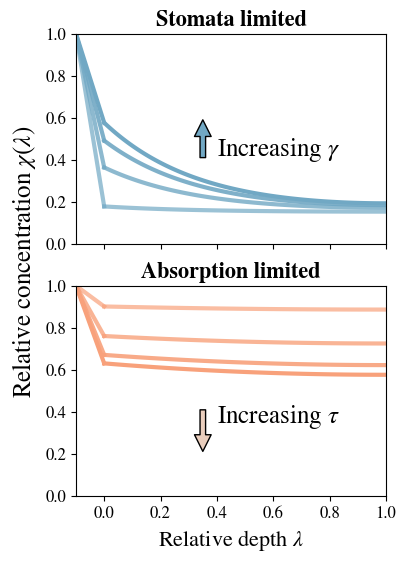

In [5]:
lambda_st = 0.1
lambdas = np.linspace(0, 1, 100)

zeta = lambda x, tau, gamma, zeta_=0.15: zeta_ + (1-zeta_)/(1 + tau*np.tanh(tau)/gamma)*(np.cosh(tau*(1-x)))/(np.cosh(tau))

gs_fig = []
tau, gammas = (3.0, [0.1, 1.0, 2, 3.0]) # tau, gammas
for gamma in gammas:
    gs_fig.append(zeta(lambdas, tau, gamma))

KL_fig = []
gamma, taus = (0.3, [0.2, 0.35, 0.45, 0.5]) # gamma, taus
for tau in taus:
    KL_fig.append(zeta(lambdas, tau, gamma))
    

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 6), sharex=True, sharey=True)
alphas = [0.7, 0.8, 0.9, 1.0]

def fill_subplot(ax, data, title, c, fs=16):
    for z, alpha in zip(data, alphas):
        ax.plot(lambdas, z, color=c, alpha = alpha, linewidth=3)
        ax.plot([-lambda_st, 0], [1, z[0]], color=c, alpha=alpha, linewidth=3)
    ax.set_title(title, fontsize=fs, weight='bold')
    ax.set_xlim(-lambda_st, 1)
    ax.set_ylim(0, 1)

# COLORS
# I : stomata
colorI = hex2rgb('71A8C4')      #hex2rgb('67a9b9')       #hex2rgb('00b9bd') #'teal' 
# II : absorption capacity
colorII = hex2rgb('EACEBD')      #hex2rgb('629076')      #hex2rgb('004853') #'darkgoldenrod'
# III : IAS
colorIII = hex2rgb('F8A17B')     #hex2rgb('dd7308')     #hex2rgb('f63700') #'seagreen'
#
point_colors = [hex2rgb('226061'), hex2rgb('B40F20')]


fill_subplot(ax1, gs_fig, 'Stomata limited', c=colorI)
ax1.text(0.4, 0.42, r'Increasing $\gamma$', fontsize=18, color='black')
ax1.annotate('', xy=(0.35, 0.6), xytext=(0.35, 0.4), arrowprops=dict(facecolor=colorI, shrink=0.05))


fill_subplot(ax2, KL_fig, 'Absorption limited', c=colorIII)
ax2.text(0.4, 0.35, r'Increasing $\tau$', fontsize=18, color='black')
ax2.annotate('', xy=(0.35, 0.2), xytext=(0.35, 0.42), arrowprops=dict(facecolor=colorII, shrink=0.05))

ax2.set_xlabel(r'Relative depth $\lambda$', fontsize=16)

fig.supylabel(r'Relative concentration $\chi(\lambda)$', fontsize=18, x=-0.04)

plt.savefig('figs/2E_example_profiles.svg')
plt.show()